## Crypto Forecasting Model For Market Data 2018 - 2021

In this Data Science project, we will be performing some data analysis as well as we will build a Light Gradient Boosting Machine ML model to forecast short term returns in 14 popular cryptocurrencies using millions of high-frequency market data 2018-2021.
<br>
#### Project Description

In this Data Science project, we will be performing some data analysis as well as we will build a Light Gradient Boosting Machine ML model to forecast short term returns in 14 popular cryptocurrencies using millions of high-frequency market data 2018-2021. The dataset used here contains information on historic trades for several crypto assets, such as Bitcoin and Ethereum. Our challenge is to predict their future returns.
<br>
***train.csv:***

   **timestamp:** All timestamps are returned as second Unix timestamps (the number of seconds elapsed since 1970-01-01 00:00:00.000 UTC). Timestamps in this dataset are multiple of 60, indicating minute-by-minute data.
   
   **Asset_ID:** The asset ID corresponding to one of the cryptocurrencies (e.g. Asset_ID = 1 for Bitcoin). The mapping from Asset_ID to crypto asset is contained in asset_details.csv.
   
   **Count:** Total number of trades in the time interval (last minute).
   
   **Open:** Opening price of the time interval (in USD).
   
   **High:** Highest price reached during time interval (in USD).
   
   **Low:** Lowest price reached during time interval (in USD).
   
   **Close:** Closing price of the time interval (in USD).
   
   **Volume:** Quantity of asset bought or sold, displayed in base currency USD.
   
   **VWAP:** The average price of the asset over the time interval, weighted by volume. VWAP is an aggregated form of trade data.
   
   **Target:** Residual log-returns for the asset over a 15 minute horizon.
<br>
***asset_details.csv:***

It provides the real name of the crypto asset for each Asset_ID and the weight each crypto asset receives in the metric. Weights are determined by the logarithm of each product's market cap (in USD), of the cryptocurrencies at a fixed point in time. Weights were assigned to give more relevance to cryptocurrencies with higher market volumes to ensure smaller cryptocurrencies do not disproportionately impact the models. In this Data Science project, We will build a Light Gradient Boosting Machine ML model to forecast short term returns in 14 popular cryptocurrencies using millions of high-frequency market data 2018-2021.
<br>
#### Technologies used:

**Language -** Python
**Algorithms -** LightGBM

### Module 1: Project Setup and Installation

This module consists of guidance videos for setup and installation of various tools and libraries that we will be needing for our project. By following these videos you can set up the environment for your project development. In our project we will be using various python packages such as NumPy ,Pandas ,sklearn,etc. We will be using Visual Studio Code Editor for development.

#### Task 1: Setup and Installation

In this task you’ll understand how to get started with vscode, python, jupyter notebook etc. with the help of a guided video and how to create a simple jupyter notebook.

#### Task 2: Installing Packages Using Pip

**Packages:**

**Data preprocessing:** NumPy and Pandas

**Data visualization:** Seaborn and Matplotlib

### Module 2: Exploratory Data Analysis (EDA)

Exploratory data analysis (EDA) is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics hypothesis testing. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling and thereby contrasts traditional indexing. We will explore the data in detail and have a detailed look at the data and its statistics. We will also define a helper function that will turn a date format into a timestamp to use for  modeling.

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import time
import warnings
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.feature_extraction import *
from sklearn.feature_selection import *
from lightgbm import *
warnings.filterwarnings("ignore")

#### Task 1: Knowing The Dataset

In this task, you’ll understand how to Explore the dataset and know what each field means.

In [3]:
path = "data/train/"
df = []
list_of_files = os.listdir(path)
train = pd.read_csv(path + list_of_files[0])
print("Number of files imported : ",1)
ctr = 2
for i in list_of_files[1:]:
    if ".csv" not in i:
        continue
    df = pd.read_csv(path + i)
    train = pd.concat([train, df],axis=0,ignore_index=True)
    print("Number of files imported : ",ctr)
    ctr += 1

Number of files imported :  1
Number of files imported :  2
Number of files imported :  3
Number of files imported :  4
Number of files imported :  5
Number of files imported :  6
Number of files imported :  7
Number of files imported :  8
Number of files imported :  9
Number of files imported :  10
Number of files imported :  11
Number of files imported :  12
Number of files imported :  13
Number of files imported :  14
Number of files imported :  15
Number of files imported :  16
Number of files imported :  17
Number of files imported :  18
Number of files imported :  19
Number of files imported :  20
Number of files imported :  21
Number of files imported :  22
Number of files imported :  23
Number of files imported :  24
Number of files imported :  25
Number of files imported :  26
Number of files imported :  27
Number of files imported :  28
Number of files imported :  29
Number of files imported :  30
Number of files imported :  31


In [4]:
path = "data/supplemental_train/"
df = []
list_of_files = os.listdir(path)
supplemental_train = pd.read_csv(path + list_of_files[0])
print("Number of files imported : ",1)
ctr = 2
for i in list_of_files[1:]:
    if ".csv" not in i:
        continue
    df = pd.read_csv(path + i)
    supplemental_train = pd.concat([supplemental_train, df],axis=0,ignore_index=True)
    print("Number of files imported : ",ctr)
    ctr += 1

Number of files imported :  1
Number of files imported :  2
Number of files imported :  3
Number of files imported :  4
Number of files imported :  5


#### Task 2: EDA - Dataset

In this you’ll understand how we will perform EDA and understand the data well.

In [5]:
train

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1530202800,12,10.0,0.190815,0.191320,0.19015,0.190740,32450.372000,0.190800,0.001392
1,1530202860,3,19.0,0.125492,0.125594,0.12539,0.125431,57357.220500,0.125477,0.002543
2,1530202860,2,12.0,697.195000,698.140000,696.50000,697.220000,1.461400,697.222803,-0.001323
3,1530202860,0,8.0,14.649900,14.649900,14.63000,14.639500,515.100000,14.637003,-0.002171
4,1530202860,1,131.0,6106.436890,6114.840000,6100.00000,6106.002890,8.465268,6106.365069,-0.000313
...,...,...,...,...,...,...,...,...,...,...
24236801,1555088340,5,301.0,5.360767,5.405400,5.33690,5.362600,8870.868597,5.361911,-0.003728
24236802,1555088340,7,24.0,6.447000,6.513000,6.40120,6.446325,538.200159,6.446251,0.000883
24236803,1555088340,6,144.0,165.264286,166.470000,164.49000,165.304286,159.952181,165.289062,-0.001292
24236804,1555088340,8,11.0,0.316200,0.325100,0.30710,0.316250,4157.185700,0.316195,0.024854


In [6]:
train.isna().sum()

timestamp         0
Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              9
Target       750338
dtype: int64

In [7]:
supplemental_train

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
...,...,...,...,...,...,...,...,...,...,...
2518273,1530701220,0,62.0,13.900000,13.9370,13.8779,13.886600,4223.480000,13.905287,-0.000749
2518274,1530701220,1,237.0,6517.981667,6527.0000,6510.0000,6517.163333,11.009299,6517.384461,-0.000594
2518275,1530701220,5,87.0,8.875133,8.9000,8.8227,8.873967,14090.011894,8.873656,0.001037
2518276,1530701220,7,18.0,16.424067,16.4376,16.4152,16.430533,976.031300,16.427441,-0.001320


In [8]:
train.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423680e+07,2.348647e+07
mean,1.577120e+09,6.292544e+00,2.864593e+02,1.432640e+03,1.436350e+03,1.429568e+03,1.432640e+03,2.868530e+05,NaN,7.121752e-06
std,3.323350e+07,4.091861e+00,8.673982e+02,6.029605e+03,6.039482e+03,6.020261e+03,6.029611e+03,2.433935e+06,NaN,5.679042e-03
min,1.514765e+09,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,1.549011e+09,3.000000e+00,1.900000e+01,2.676500e-01,2.681600e-01,2.669000e-01,2.676483e-01,1.410725e+02,2.676368e-01,-1.694354e-03
50%,1.578372e+09,6.000000e+00,6.400000e+01,1.428860e+01,1.431250e+01,1.426300e+01,1.428920e+01,1.295415e+03,1.428769e+01,-4.289844e-05
75%,1.606198e+09,9.000000e+00,2.210000e+02,2.288743e+02,2.293000e+02,2.284200e+02,2.288729e+02,2.729764e+04,2.288728e+02,1.601520e-03
max,1.632182e+09,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


In [9]:
supplemental_train.describe()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.518278e+06,2.518278e+06,2.518278e+06,2.518278e+06,2.518278e+06,2.518278e+06,2.518278e+06,2.518278e+06,2.518278e+06,2.371408e+06
mean,1.523342e+09,5.800175e+00,1.090530e+02,1.200493e+03,1.205472e+03,1.195360e+03,1.200487e+03,1.687617e+04,1.200467e+03,4.837784e-06
std,4.589179e+06,4.075112e+00,1.963361e+02,2.825179e+03,2.838651e+03,2.811392e+03,2.825167e+03,9.332418e+04,2.825119e+03,6.862405e-03
min,1.514765e+09,0.000000e+00,1.000000e+00,2.312250e-02,2.332400e-02,1.000000e-02,2.315450e-02,1.000000e-08,2.314700e-02,-5.093509e-01
25%,1.519454e+09,2.000000e+00,1.300000e+01,9.235613e+00,9.252400e+00,9.217200e+00,9.235700e+00,6.553100e+01,9.235086e+00,-2.151871e-03
50%,1.523720e+09,6.000000e+00,3.800000e+01,4.221367e+01,4.249700e+01,4.189800e+01,4.221117e+01,3.788628e+02,4.221474e+01,-4.034125e-05
75%,1.527363e+09,9.000000e+00,1.240000e+02,6.998179e+02,7.015075e+02,6.981700e+02,6.998063e+02,2.876748e+03,6.998129e+02,2.039710e-03
max,1.530701e+09,1.300000e+01,6.121000e+03,1.718974e+04,1.725200e+04,1.711500e+04,1.717913e+04,1.298793e+07,1.718579e+04,9.641699e-01


In [10]:
asset_details = pd.read_csv("data/asset_details.csv")
asset_details.sort_values(by="Asset_ID",ascending=True)

,Asset_ID,Weight,Asset_Name
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
0,2,2.397895,Bitcoin Cash
10,3,4.406719,Cardano
13,4,3.555348,Dogecoin
3,5,1.386294,EOS.IO
5,6,5.894403,Ethereum
4,7,2.079442,Ethereum Classic
11,8,1.098612,IOTA
6,9,2.397895,Litecoin


#### Task 3: Timestamps

In this you’ll understand how we convert date time to timestamps.

In [11]:
datetime_to_timestamp = lambda x: x.timestamp()

### Module 3: Plotting - Data Visualization

Data visualization is the representation of data through the use of common graphics, such as charts, plots, infographics, and even animations. In our project, we use heatmaps, correlation matrices, and other plots to have an interesting detailed view of coin prices.

**Advantages:**

* Easily sharing information
* Interactively explore opportunities
* Visualize patterns and relationships

#### Task 1: Plotting BTC and ETH

In this you’ll understand how we create some interesting plots for BTC and ETH and compare their changes with respect to each other.

In [12]:
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [13]:
btc_asset_id = asset_details[asset_details["Asset_Name"]=="Bitcoin"]["Asset_ID"].values[0]
eth_asset_id = asset_details[asset_details["Asset_Name"]=="Ethereum"]["Asset_ID"].values[0]

btc = train[train["Asset_ID"]==btc_asset_id][["timestamp","Count","Open","High","Low","Close","Volume","VWAP","Target"]].reset_index(drop=True)
eth = train[train["Asset_ID"]==eth_asset_id][["timestamp","Count","Open","High","Low","Close","Volume","VWAP","Target"]].reset_index(drop=True)

btc_corr = btc[["Count","Open","High","Low","Close","Volume","VWAP","Target"]].corr()
eth_corr = btc[["Count","Open","High","Low","Close","Volume","VWAP","Target"]].corr()

<Axes: >

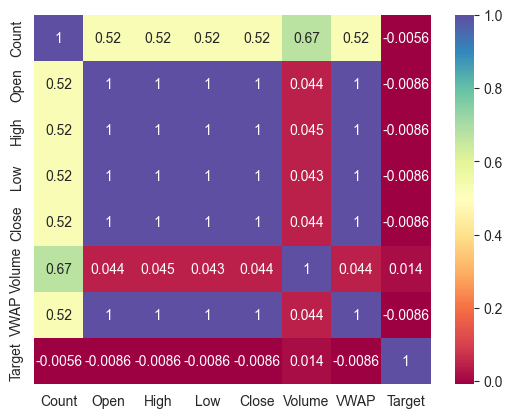

In [14]:
sns.heatmap(btc_corr,annot=True,cmap="Spectral")

<Axes: >

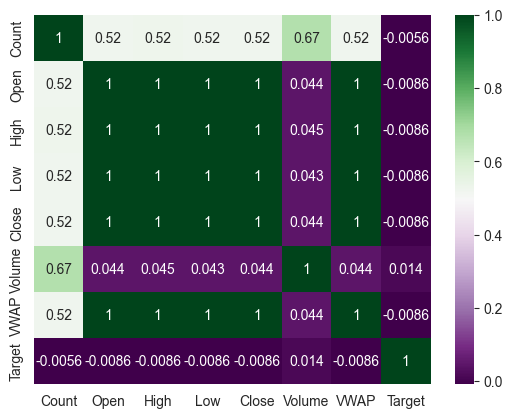

In [15]:
sns.heatmap(eth_corr,annot=True,cmap="PRGn")

In [16]:
btc_close = btc[["timestamp","Close"]]
eth_close = eth[["timestamp","Close"]]
btc_close["timestamp"] = list(map(lambda x: pd.Timestamp(datetime.fromtimestamp(x)),btc_close["timestamp"]))
eth_close["timestamp"] = list(map(lambda x: pd.Timestamp(datetime.fromtimestamp(x)),eth_close["timestamp"]))

<Axes: xlabel='timestamp', ylabel='Close'>

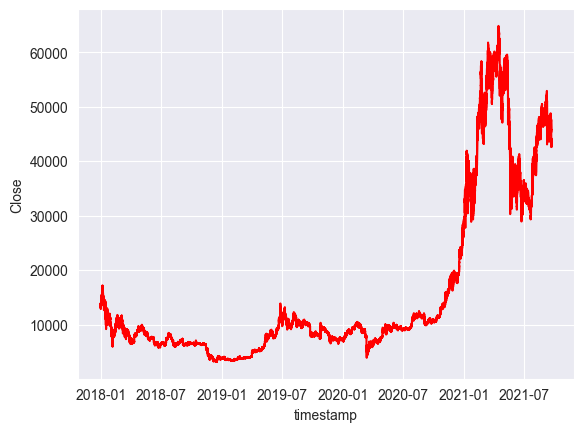

In [17]:
sns.lineplot(x=btc_close["timestamp"],y=btc_close["Close"],color="red")

<Axes: xlabel='timestamp', ylabel='Close'>

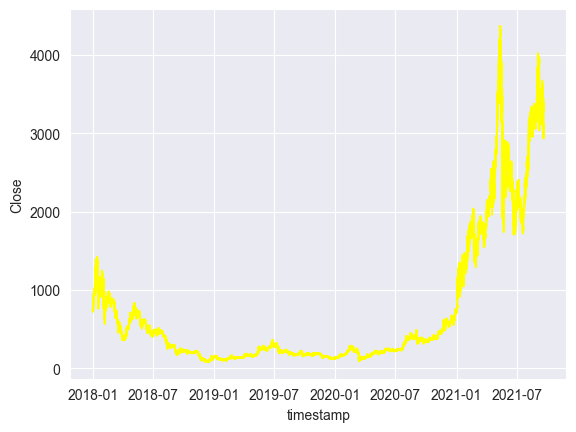

In [18]:
sns.lineplot(x=eth_close["timestamp"],y=eth_close["Close"],color="yellow")

In [19]:
train_10000 = train[-10000:].reset_index()
ad = asset_details.sort_values(by="Asset_ID").reset_index(drop=True)
corr_df = pd.DataFrame()
for i in ad["Asset_ID"]:
    corr_df[i] = train_10000[train_10000["Asset_ID"]==i]["Target"].reset_index(drop=True)
corr_df.drop(columns=10,inplace=True)
corr_df.dropna(axis=0,ignore_index=True,inplace=True)
col = ad[ad["Asset_ID"]!=10]["Asset_Name"].values
corr_df.columns = col
corr_df

,Binance Coin,Bitcoin,Bitcoin Cash,Cardano,Dogecoin,EOS.IO,Ethereum,Ethereum Classic,IOTA,Litecoin,Monero,Stellar,TRON
0,0.001627,0.001646,0.001805,0.002018,0.006126,-0.002794,-0.000582,-0.007540,-0.004951,0.000658,-0.001664,-0.005483,-0.004867
1,-0.000153,-0.000162,-0.000358,0.000049,0.007576,-0.002990,0.002164,-0.005642,-0.003964,0.006186,0.000000,-0.005140,-0.005356
2,-0.001258,0.000662,0.002108,-0.003037,0.008655,0.002346,0.000314,-0.008558,-0.003468,0.004627,0.004665,-0.004937,-0.004060
3,-0.000911,0.001305,0.004513,-0.001520,0.009373,0.002513,0.002155,-0.005523,-0.002477,0.006820,-0.000375,-0.006186,-0.004548
4,-0.000317,-0.000222,0.001586,0.001238,0.009369,-0.004694,0.000402,-0.003168,0.044606,0.002325,-0.000452,-0.004585,-0.006207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.000641,-0.001215,0.001637,0.001915,0.002845,-0.000514,-0.000516,-0.000801,0.039078,-0.001534,0.003066,-0.005606,-0.006053
139,0.000905,-0.001268,0.006091,0.005031,0.000709,0.003232,0.001403,0.001639,0.003458,0.002204,0.001109,-0.006833,-0.001881
140,0.002024,-0.001113,0.005973,0.003683,0.000000,0.005293,0.000407,0.000354,0.003618,0.002936,-0.001488,-0.006982,-0.001526
141,0.004438,-0.000892,0.004885,0.002506,-0.000708,0.005322,0.001184,0.006662,-0.037196,0.003556,0.008347,-0.004614,0.000105


<Axes: >

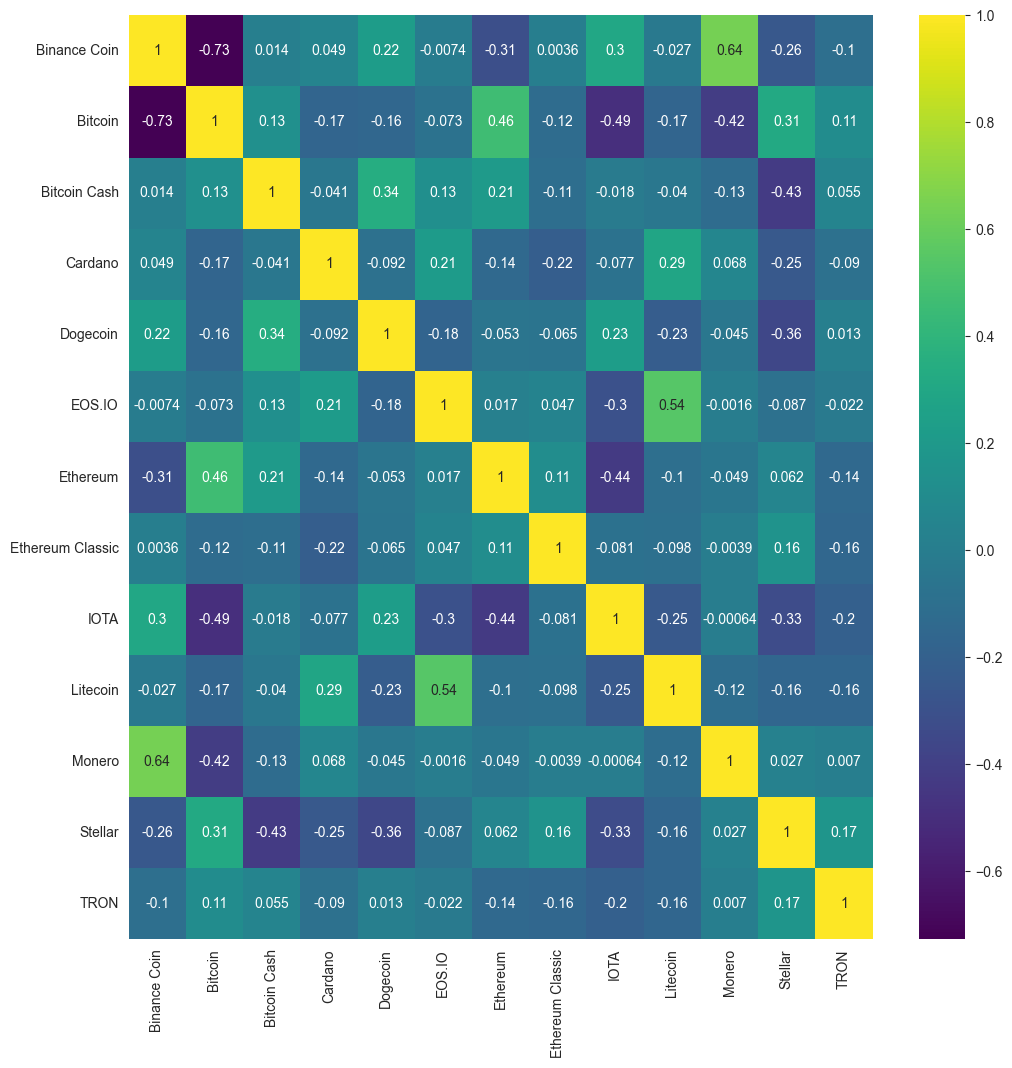

In [20]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,12))
sns.heatmap(ax=ax,data=corr_df.corr(),annot=True,cmap="viridis")

### Module 4: Prediction

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency (6 times faster than XGBoost)
* Lower memory usage
* Better accuracy
* Support of parallel, distributed, and GPU learning
* Capable of handling large-scale data

Only situation where LGBM is not advised is with small datasets because of its sensitivity to overfitting. We will harness this powerful ML model to make predictions based on a large dataset containing 4 years worth of cryptocurrency data.

#### Task 1: Feature Engineering

In this you’ll understand how we create some new features using fields from data.

In [21]:
df = train.copy()

In [22]:
df = train.copy()
df["hlco_ratio"] = list(map((lambda a,b,c,d: (a - b)/(c - d) if (c-d)!=0 else np.nan),df["High"],df["Low"],df["Close"],df["Open"]))
df["upper_shadow"] = list(map((lambda a,b,c: (a - max(b, c))),df["High"],df["Close"],df["Open"]))
df["lower_shadow"] = list(map((lambda a,b,c: (min(a, b) - c)),df["Close"],df["Open"],df["Low"]))
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,hlco_ratio,upper_shadow,lower_shadow
0,1530202800,12,10.0,0.190815,0.191320,0.19015,0.190740,32450.372000,0.190800,0.001392,-15.600000,0.000505,0.000590
1,1530202860,3,19.0,0.125492,0.125594,0.12539,0.125431,57357.220500,0.125477,0.002543,-3.344262,0.000102,0.000041
2,1530202860,2,12.0,697.195000,698.140000,696.50000,697.220000,1.461400,697.222803,-0.001323,65.600000,0.920000,0.695000
3,1530202860,0,8.0,14.649900,14.649900,14.63000,14.639500,515.100000,14.637003,-0.002171,-1.913462,0.000000,0.009500
4,1530202860,1,131.0,6106.436890,6114.840000,6100.00000,6106.002890,8.465268,6106.365069,-0.000313,-34.193548,8.403110,6.002890


In [40]:
id = asset_details[asset_details["Asset_Name"]=="Bitcoin"]["Asset_ID"].values[0]
btc = df[df["Asset_ID"]==id].drop(columns=["timestamp","Asset_ID"]).dropna(how="any").reset_index(drop=True)
X = btc.drop(columns="Target")
y = btc["Target"]

#### Task 2: Building LGBM Model

In this you’ll understand how we will build the model.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
lgbm = LGBMRegressor()
model = lgbm.fit(X_train,y_train)

Python(8328) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 1564316, number of used features: 10
[LightGBM] [Info] Start training from score -0.000001


#### Task 3: Hyperparameter Tuning

In this you’ll understand how we will tune the hyperparameters of the model.

#### Task 4: Evaluation And Prediction

In this you’ll understand how we will use the model to predict on test data and evaluate the performance.